In [1]:
import os, sys, re
import numpy as np
import pandas as pd

import imp
import _config
imp.reload(_config)
from _config import OUT_PLACE, OLIGO_LIBRARY, PRJ_NAME

In [ ]:

# MERGED_INP_DIR = os.path.join(OUT_PLACE,"c1b_merge_tx_oligos_better")
# files = os.listdir(MERGED_INP_DIR)

# exp_readcounts = None

# for i,f in enumerate(files):
#     #if f != "merged_56_7.csv": continue
#     if "60" in f: 
#         print( f"skipping {f}")
#     #if i%25 == 0:
#     print(f"{i} of {len(files)}")

#     #print(i)
#     #if i > 10:break
        
#     INP_FILE = os.path.join(MERGED_INP_DIR,f)
#     merged_results = pd.read_csv(INP_FILE)
    
#     if exp_readcounts is None:
#         exp_readcounts = merged_results.groupby(by="exp")[["oligo_reads","dictionary_reads"]].sum()
#     else:
#         exp_readcounts = exp_readcounts.add(merged_results.groupby(by="exp")[["oligo_reads","dictionary_reads"]].sum(),fill_value =  0)
    
    
    

In [16]:
# exp_readcounts.to_csv("../out/0707_exp_readcounts.csv")

In [ ]:

MERGED_INP_DIR = os.path.join(OUT_PLACE,"c1b_merge_tx_oligos_better")
files = os.listdir(MERGED_INP_DIR)
all_results2 = None

for i,f in enumerate(files):
    #if f != "merged_56_7.csv": continue
    if "60" in f: 
        print( f"skipping {f}")
    #if i%25 == 0:
    print(f"{i} of {len(files)}")

    #print(i)
    #if i > 10:break
        
    INP_FILE = os.path.join(MERGED_INP_DIR,f)
    merged_results = pd.read_csv(INP_FILE,index_col=["bc","umi","exp","oligo"])
    print("done loading")
    if all_results2 is None:
        all_results2 = merged_results
    else:
        all_results2 = all_results2.add(merged_results,fill_value =  0)
    print("done adding")
    #mapped_results = merged_results.loc[merged_results.exp != "other"]
    #all_results2 = all_results2.append(merged_results, ignore_index=True)
    #break
    
    

0 of 480
done loading
done adding
1 of 480
done loading
done adding
2 of 480
done loading
done adding
3 of 480
done loading
done adding
4 of 480
done loading
done adding
5 of 480
done loading
done adding
6 of 480
done loading
done adding
7 of 480
done loading


In [3]:
print("HI")

HI


In [3]:

MERGED_INP_DIR = os.path.join(OUT_PLACE,"c1_merge_tx_oligos")
files = os.listdir(MERGED_INP_DIR)
all_results = pd.DataFrame()

for i,f in enumerate(files):
    #if f != "merged_56_7.csv": continue
    if "60" in f: 
        print( f"skipping {f}")
    if i%25 == 0:
        print(f"{i} of {len(files)}")

    print(i)
    if i > 10:break
        
    INP_FILE = os.path.join(MERGED_INP_DIR,f)
    merged_results = pd.read_csv(INP_FILE)
    #mapped_results = merged_results.loc[merged_results.exp != "other"]
    all_results = all_results.append(merged_results, ignore_index=True)
    #break
    

0 of 480
0


KeyboardInterrupt: 

In [ ]:
print("HI")

In [172]:
all_results.umi.nunique()

1070359

In [173]:
grped = all_results.groupby(["exp","oligo"]).apply(lambda x:x.umi.nunique())

In [174]:
oligo_exp_info = pd.DataFrame(index=grped.index)

In [175]:
#all_results_og = all_results
#all_results = all_results.loc[all_results.exp != "other"]
#all_results=all_results_og
all_results = all_results.loc[all_results.bc != "GGGGGGGGGGGGGGG"]

oligo_exp_info["n_transcripts"] = all_results.groupby(["exp","oligo"]).apply(lambda x:x.umi.nunique())
oligo_exp_info["n_observed_bcs"] = all_results.groupby(["exp","oligo"]).apply(lambda x:x.bc.nunique())
oligo_exp_info["oligo"] = oligo_exp_info.index.map(lambda x:x[1])
oligo_exp_info["exp"] = oligo_exp_info.index.map(lambda x:x[0])
oligo_exp_info.to_csv("../data/0612_oligo_exp_statistics.csv")

    
oligo_info = pd.DataFrame()
oligo_info["n_transcripts"] = all_results.groupby(["oligo"]).apply(lambda x:x.umi.nunique())
oligo_info["n_observed_bcs"] = all_results.groupby(["oligo"]).apply(lambda x:x.bc.nunique())




In [176]:
oligo_info

,n_transcripts,n_observed_bcs
oligo,,
0,2240,177
1,2963,354
2,1914,209
3,1298,136
4,565,71
5,1360,80
6,2949,111
7,1866,79
8,7403,178


In [177]:

oligo_info["oligo"] = oligo_info.index
oligo_info.to_csv("../data/0612_oligo_statistics.csv")

In [178]:
oligo_info = pd.read_csv("../data/0612_oligo_statistics.csv")

In [179]:


oligos_lib = OLIGO_LIBRARY
oligos_lib["id"] = oligos_lib.index
oligos_lib["starts"] = oligos_lib.chromosome_info.apply(lambda x: int(re.compile("(\d+)-(\d+)").search(x).groups()[0]))
oligos_lib["starts"] = oligos_lib.starts-oligos_lib.starts.min()

#test = oligo_info
candid_regex = re.compile("candid_(\d+)")
neg_regex = re.compile("Neg_(\d+)")
mutant_regex = re.compile("mut(\d+)$")


oligos_lib["locus_ids"] = oligos_lib.RefSeqID.apply(lambda x: int(candid_regex.search(x).groups()[0]) if candid_regex.search(x) else neg_regex.search(x).groups()[0] )
oligos_lib["mutant_num"] = oligos_lib.RefSeqID.apply(lambda x: int(mutant_regex.search(x).groups()[0]) if mutant_regex.search(x) else 0 )
oligos_lib["is_cand"] = oligos_lib.RefSeqID.apply(lambda x: True if candid_regex.search(x) else False )
oligos_lib["is_neg"] = oligos_lib.RefSeqID.apply(lambda x: True if neg_regex.search(x) else False )
oligo_info = oligo_info.join(oligos_lib, on ="oligo")#.dropna()

#oligo_info["locus_ids"] = oligo_info.join(oligos_lib[["locus_ids","mutant_num","is_cand","is_neg"]],on="oligo")
oligo_info["mutant_num"] = oligo_info.RefSeqID.apply(lambda x: int(mutant_regex.search(x).groups()[0]) if mutant_regex.search(x) else 0 )
oligo_info["is_cand"] = oligo_info.RefSeqID.apply(lambda x: True if candid_regex.search(x) else False )
oligo_info["is_neg"] = oligo_info.RefSeqID.apply(lambda x: True if neg_regex.search(x) else False )

oligo_info["mutant_start"] = oligo_info.starts + oligo_info.mutant_num*30
oligo_info["enrichment"] = oligo_info.n_transcripts / oligo_info.n_observed_bcs

In [180]:
print(f"""
NUMBER OF UNIQUE BARCODES: {all_results.bc.nunique()}
NUMBER OF UNIQUE MOLECULAR UMIS: {all_results.umi.nunique()}
AVERAGE NUMBER OF TRANSCRIPTS (UMIS) PER OLIGO: {oligo_info.n_transcripts.mean()}
AVERAGE NUMBER OF BARCODES PER OLIGO: {oligo_info.n_observed_bcs.mean()}
      """)


NUMBER OF UNIQUE BARCODES: 1750553
NUMBER OF UNIQUE MOLECULAR UMIS: 1070359
AVERAGE NUMBER OF TRANSCRIPTS (UMIS) PER OLIGO: 1812.3791607827316
AVERAGE NUMBER OF BARCODES PER OLIGO: 178.03207585233002
      


In [181]:
print(f"""
NUMBER OF UNIQUE BARCODES: {all_results.loc[all_results.exp!="other"].bc.nunique()}
NUMBER OF UNIQUE MOLECULAR UMIS: {all_results.loc[all_results.exp!="other"].umi.nunique()}
AVERAGE NUMBER OF TRANSCRIPTS (UMIS) PER OLIGO: {oligo_info.n_transcripts.mean()}
AVERAGE NUMBER OF BARCODES PER OLIGO: {oligo_info.n_observed_bcs.mean()}
      """)


NUMBER OF UNIQUE BARCODES: 1747329
NUMBER OF UNIQUE MOLECULAR UMIS: 1068151
AVERAGE NUMBER OF TRANSCRIPTS (UMIS) PER OLIGO: 1812.3791607827316
AVERAGE NUMBER OF BARCODES PER OLIGO: 178.03207585233002
      


In [182]:
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.nonparametric.smoothers_lowess import lowess
import seaborn as sns

In [183]:
import scipy.signal as ssig

In [184]:
oligo_info

,oligo,n_transcripts,n_observed_bcs,oligo.1,chromosome_info,RefSeqID,Sequences,Oligo,id,starts,locus_ids,mutant_num,is_cand,is_neg,mutant_start,enrichment
0,0,2240,177,0,chr22:38699734-38699914,hg38_ct_12kSTARRseqcandid_1,ATATCAGTATCAAGATGCCAAGGAGAAGGGTCCCCTACCTCTGGAA...,tagatTGAtCTAGAGCATGCACCGGATATCAGTATCAAGATGCCAA...,0,0,1,0,True,False,0,12.655367
1,1,2963,354,1,chr22:38699764-38699944,hg38_ct_12kSTARRseqcandid_2,TCCCCTACCTCTGGAAAATCTCTTGCAGCGTATCCCGGGTGAAGGC...,tagatTGAtCTAGAGCATGCACCGGTCCCCTACCTCTGGAAAATCT...,1,30,2,0,True,False,30,8.370056
2,2,1914,209,2,chr22:38699794-38699974,hg38_ct_12kSTARRseqcandid_3,TATCCCGGGTGAAGGCATTGCTGTCCTGGAAGACGTTATTGAGGGC...,tagatTGAtCTAGAGCATGCACCGGTATCCCGGGTGAAGGCATTGC...,2,60,3,0,True,False,60,9.157895
3,3,1298,136,3,chr22:38699824-38700004,hg38_ct_12kSTARRseqcandid_4,AGACGTTATTGAGGGCGTGGAGGGCACAAAGCTCCCTGCGCTGTTT...,tagatTGAtCTAGAGCATGCACCGGAGACGTTATTGAGGGCGTGGA...,3,90,4,0,True,False,90,9.544118
4,4,565,71,4,chr22:38699854-38700034,hg38_ct_12kSTARRseqcandid_5,GCTCCCTGCGCTGTTTCTCATGGTAGATTTGTGGGGGTGCTGCCTG...,tagatTGAtCTAGAGCATGCACCGGGCTCCCTGCGCTGTTTCTCAT...,4,120,5,0,True,False,120,7.957746
5,5,1360,80,5,chr22:38699884-38700064,hg38_ct_12kSTARRseqcandid_6,GTGGGGGTGCTGCCTGGGGCAGCTCCAATGATTCAGATTTGGCCTT...,tagatTGAtCTAGAGCATGCACCGGGTGGGGGTGCTGCCTGGGGCA...,5,150,6,0,True,False,150,17.000000
6,6,2949,111,6,chr22:38699914-38700094,hg38_ct_12kSTARRseqcandid_7,ATTCAGATTTGGCCTTGTCTCCTTTCCATGGCACACAACTCATGTT...,tagatTGAtCTAGAGCATGCACCGGATTCAGATTTGGCCTTGTCTC...,6,180,7,0,True,False,180,26.567568
7,7,1866,79,7,chr22:38699944-38700124,hg38_ct_12kSTARRseqcandid_8,GCACACAACTCATGTTTTTTGTTTTAGGTTCCAGAGATGGCTATAA...,tagatTGAtCTAGAGCATGCACCGGGCACACAACTCATGTTTTTTG...,7,210,8,0,True,False,210,23.620253
8,8,7403,178,8,chr22:38699974-38700154,hg38_ct_12kSTARRseqcandid_9,CCAGAGATGGCTATAAACACCCCACTCTTCCCTCTAGAGGAAGAAT...,tagatTGAtCTAGAGCATGCACCGGCCAGAGATGGCTATAAACACC...,8,240,9,0,True,False,240,41.589888
9,9,1209,120,9,chr22:38700004-38700184,hg38_ct_12kSTARRseqcandid_10,CCTCTAGAGGAAGAATGTAAGCTTCTCAGTCTTTTCCGGATTCCTG...,tagatTGAtCTAGAGCATGCACCGGCCTCTAGAGGAAGAATGTAAG...,9,270,10,0,True,False,270,10.075000


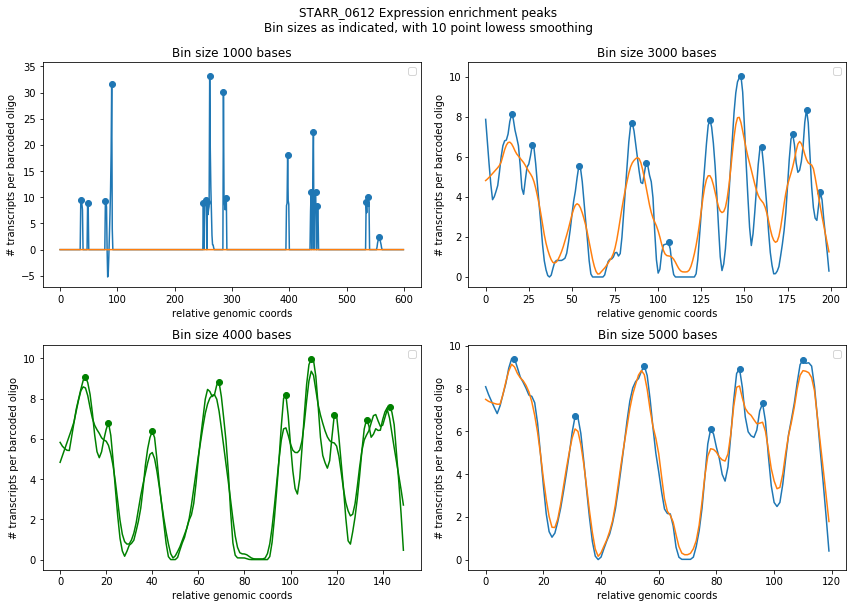

In [185]:

from cycler import cycler
import numpy as np
import matplotlib.pyplot as plt


custom_cycler = cycler('color', ['c', 'm', 'y', 'k']) \
    + cycler('lw', [1, 2, 3, 4])

sizes =  [1000,3000,4000,5000]
f,subs = plt.subplots(2,2)
f.set_size_inches(12,8)
f.suptitle(f"{PRJ_NAME} Expression enrichment peaks\nBin sizes as indicated, with 10 point lowess smoothing", y=1.05)

for i,binsize in enumerate(sizes):
    
    ax = subs[i//2][i%2]
    plt.sca(ax)
    
    bins = pd.Series(0,index = np.arange(0,600000,binsize))
    binned_oligos = oligo_info.set_index(oligo_info.apply(lambda x: x.starts//binsize,axis=1))
    bin_enrichments =bins.add(oligo_info.groupby(oligo_info.starts.apply(lambda x: (x//binsize)*binsize)).enrichment.mean(),fill_value=0)
    bin_coverage =bins.add(oligo_info.groupby(oligo_info.starts.apply(lambda x: (x//binsize)*binsize)).count().iloc[:,0],fill_value=0)
    
    bin_coverage = oligo_info.groupby(oligo_info.starts.apply(lambda x: x//binsize)).count()
    xax = bin_enrichments.index/max(bins.index)
    l1 = np.array([y for x,y in lowess(bin_enrichments,xax,frac=10/float(len(xax)))])
    l2 = np.array([y for x,y in lowess(bin_enrichments,xax,frac=.1)])

    
    req_prominence =float(( max(l1) - min(l1) ))/ 20
    peaks = ssig.find_peaks(l1,prominence=req_prominence)[0]
    
    if i == 2: 
        line1, = plt.plot(l1,color="green")
        line, = plt.plot(l2,color="green")
    else:

        line1, = plt.plot(l1)
        line, = plt.plot(l2)

    plt.scatter(peaks, l1[peaks], c= line1.get_color())
    plt.legend()

    
    ax.set_ylabel("# transcripts per barcoded oligo")
    ax.set_xlabel("relative genomic coords")
    ax.set_title(f"Bin size {binsize} bases")
    
plt.tight_layout()
    
    

    

In [186]:
#peak and binning parameters
binsize = 3000
peak_plateau_size = 10

#data processing
bins = pd.Series(0,index = np.arange(0,600000,binsize))
binned_oligos = oligo_info.set_index(oligo_info.apply(lambda x: x.starts//binsize,axis=1))
bin_enrichments =bins.add(oligo_info.groupby(oligo_info.starts.apply(lambda x: (x//binsize)*binsize)).enrichment.mean(),fill_value=0)
bin_coverage =bins.add(oligo_info.groupby(oligo_info.starts.apply(lambda x: (x//binsize)*binsize)).count().iloc[:,0],fill_value=0)
xax = bin_enrichments.index/max(bins.index)

#compute a smoothed enrichment signal & call peaks
l = np.array([y for x,y in lowess(bin_enrichments,xax,frac=10/float(len(xax)))])
req_prominence =float(( max(l) - min(l) ))/ 20
peaks = ssig.find_peaks(l,prominence=req_prominence)[0]



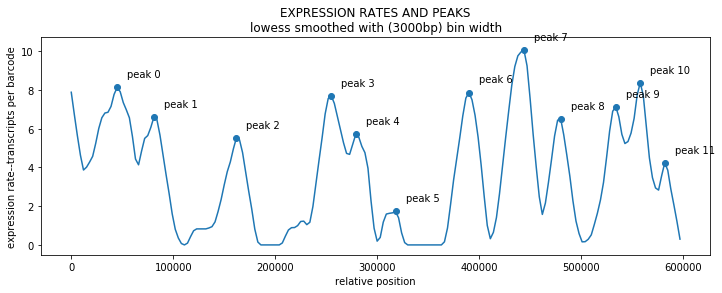

In [187]:
f = plt.gcf()
f.set_size_inches(12,4)
ax = plt.gca()

ax.set_title(f"EXPRESSION RATES AND PEAKS\nlowess smoothed with ({binsize}bp) bin width")
line, = plt.plot(bins.index,l)
plt.scatter(bins.index[peaks], l[peaks], c= line.get_color())
ax.set_ylabel("expression rate--transcripts per barcode")
ax.set_xlabel("relative position")

for i,p in enumerate(peaks):
    ax.annotate(f"peak {i}",[bins.index[p],l[p]],xytext=[10,10],textcoords="offset points")

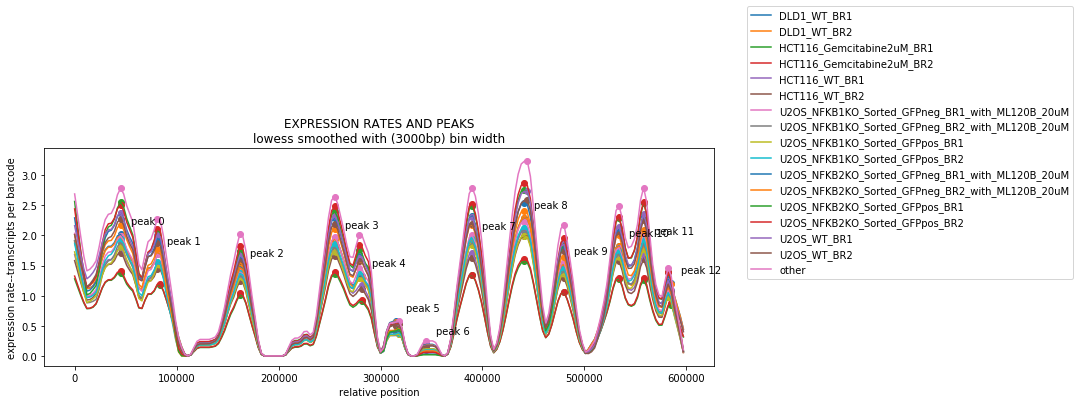

In [188]:
#peak and binning parameters
binsize = 3000
peak_plateau_size = 10

for j,exp in enumerate(oligo_exp_info.exp.unique()):

    oinfo = oligo_exp_info.loc[oligo_exp_info.exp == exp]
    oinfo = oinfo.drop(["oligo","exp"],axis="columns").reset_index().join(oligos_lib,on="oligo")
    oinfo["enrichment"] = oinfo.n_transcripts / oinfo.n_observed_bcs
    #data processing
    bins = pd.Series(0,index = np.arange(0,600000,binsize))
    binned_oligos = oinfo.set_index(oinfo.apply(lambda x: x.starts//binsize,axis=1))
    bin_enrichments =bins.add(oinfo.groupby(oinfo.starts.apply(lambda x: (x//binsize)*binsize)).enrichment.mean(),fill_value=0)
    bin_coverage =bins.add(oinfo.groupby(oinfo.starts.apply(lambda x: (x//binsize)*binsize)).count().iloc[:,0],fill_value=0)
    xax = bin_enrichments.index/max(bins.index)

    #compute a smoothed enrichment signal & call peaks
    l = np.array([y for x,y in lowess(bin_enrichments,xax,frac=peak_plateau_size/float(len(xax)))])
    req_prominence =float(( max(l) - min(l) ))/ 20
    peaks = ssig.find_peaks(l,prominence=req_prominence)[0]



    f = plt.gcf()
    f.set_size_inches(12,4)
    ax = plt.gca()

    ax.set_title(f"EXPRESSION RATES AND PEAKS\nlowess smoothed with ({binsize}bp) bin width")
    line, = plt.plot(bins.index,l,label=exp)
    plt.scatter(bins.index[peaks], l[peaks], c= line.get_color())
    ax.set_ylabel("expression rate--transcripts per barcode")
    ax.set_xlabel("relative position")

    if j == 0:
        for i,p in enumerate(peaks):
            ax.annotate(f"peak {i}",[bins.index[p],l[p]],xytext=[10,10],textcoords="offset points")
            
plt.legend(loc=[1.05,.4])



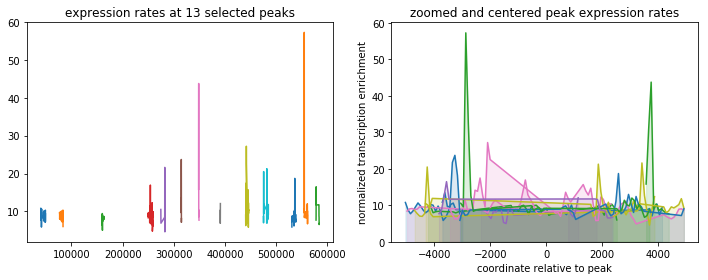

In [189]:
ostarts = oligo_info.set_index("starts").sort_index()
peak_colors = {}

f, subs = plt.subplots(1,2)
f.set_size_inches(10,4)

subs[0].set_title(f"expression rates at {len(peaks)} selected peaks")
subs[1].set_title(f"zoomed and centered peak expression rates")

for p in peaks:

    peak_x = bins.index[p]
    peak_region = [peak_x - 5000, peak_x + 5000]
    rstart = peak_region[0]
    rend = peak_region[1]
    
    #peak_oligos = oligo_info.loc[oligo_info.apply(lambda x:( x.starts > rstart) &(x.starts<rend),axis=1)]
    peak_oligos = ostarts.loc[rstart:rend].reset_index()
    
    oligo_start_enrichments = peak_oligos.groupby(peak_oligos.starts.apply(lambda x: (x // 90)*90 )).enrichment.mean()

    #plt.figure(f1.number)
    plt.sca(subs[0])
    line, = plt.plot(oligo_start_enrichments)
    peak_colors[p] = line.get_color()
    ax.set_xlabel("genomic coordinate")
    ax.set_ylabel("# transcripts per umi")
    
    #plt.figure(f2.number)
    plt.sca(subs[1])
    ax = subs[1]
    
    #smoothed = lowess(oligo_start_enrichments,oligo_start_enrichments - peak_x,frac= .1)
    
    enrichments2 = oligo_start_enrichments #peak_oligos.groupby("starts").enrichment.mean()
    smoothed = np.array([e[1] for e in lowess(enrichments2,enrichments2.index,  frac= .1)])
    #ax.plot(oligo_start_enrichments.index - peak_x, oligo_start_enrichments / oligo_start_enrichments.sum())

    ax.set_xlabel("coordinate relative to peak")
    ax.set_ylabel("normalized transcription enrichment")
    
    line, = ax.plot(enrichments2.index - peak_x,smoothed )
    ax.stackplot(enrichments2.index - peak_x,smoothed,alpha=.15,color=line.get_color())
    
plt.tight_layout()

In [190]:
peak_region

[577000, 587000]

IndexError: index 3 is out of bounds for axis 0 with size 3

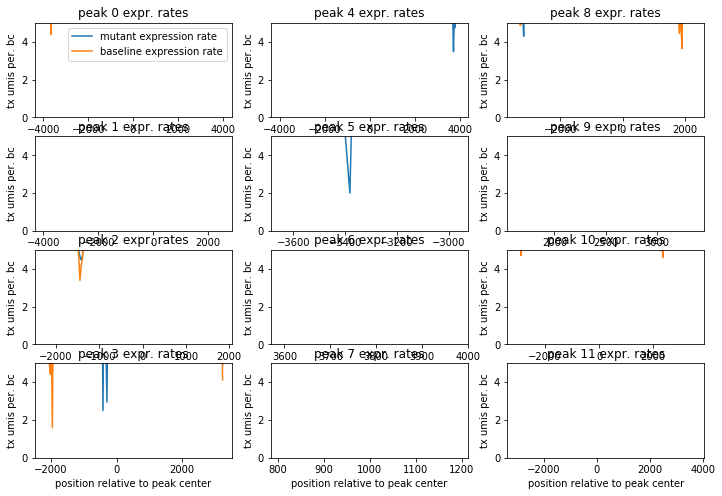

In [191]:
ostarts = ostarts.reset_index().sort_values(["starts","mutant_start"]).set_index("starts")
unmutated = ostarts.loc[ostarts.mutant_num==0]
mutated = ostarts.loc[ostarts.mutant_num >0]

f,subs = plt.subplots(4,3)
f.set_size_inches(12,8)

for i,p in enumerate(peaks):
    plt.sca(subs[i%4][i//4])
    peak_x = bins.index[p]
    peak_region = [peak_x - 4000, peak_x + 4000]
    rstart = peak_region[0]
    rend = peak_region[1]
    
    #peak_oligos = oligo_info.loc[oligo_info.apply(lambda x:( x.starts > rstart) &(x.starts<rend),axis=1)]
    peak_oligos = ostarts.loc[rstart:rend].reset_index()
    
    avg_enrichments = peak_oligos.reset_index().loc[peak_oligos.mutant_num==0].reset_index().groupby("starts").enrichment.mean()
    mutant_enrichments =  peak_oligos.reset_index().loc[peak_oligos.mutant_num>0].groupby(["starts","mutant_start"]).enrichment.mean()
    mutant_enrichments2= mutant_enrichments.reset_index().join(avg_enrichments,on="starts",rsuffix="_baseline")
    mutant_enrichments2["mutant_fold_change"] = mutant_enrichments2["enrichment"] / mutant_enrichments2["enrichment_baseline"]
    yvals= (mutant_enrichments2.groupby("starts").enrichment.mean()).sort_index()
    xvals = yvals.index - peak_x
    
    plt.plot(xvals,yvals.rename("mutant expression rate"))
    
    yvals2= (avg_enrichments.reset_index().groupby("starts").enrichment.mean()).sort_index()
    xvals2 = yvals2.index - peak_x
    plt.plot(xvals2,yvals2.rename("baseline expression rate"))
    
    plt.gca().set_title(f"peak {i} expr. rates")


    plt.gca().set_ylim([0,5])
    plt.gca().set_ylabel("tx umis per. bc")
    plt.gca().set_xlabel("position relative to peak center")
    
    if i == 0: plt.legend()
    #if i == 1: break
    
plt.tight_layout()